# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

*FILL IN:*

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

In [3]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from folium import plugins
from folium.plugins import HeatMap
#chose style for the code 
plt.style.use('fivethirtyeight')
#to disply all columns in the table 

pd.set_option('display.max_columns', 500)

#### **Dataset 1**

Type: accessing APIs 

Method: Gather data by accessing APIs from source data.lacity.org (e.g., The data was gathered using the "API Access" method from https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/data_preview source.)

Dataset variables:

*   *Variable 1 FILL IN* (e.g., H_MEAN: Mean hourly wage)
*   *Variable 2 FILL IN*

In [4]:
#FILL IN 1st data gathering and loading method
#crime data website : https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/data_preview

data=requests.get('https://data.lacity.org/resource/2nrs-mtv8.json').json()

data_crime_2020_2024 = pd.DataFrame.from_dict(data)


#### Dataset 2

Type: CSV File

Method:  The data was gathered using the Download data manually method from https://data.lacity.org/ source.)

Dataset variables:

*   *Variable 1 FILL IN* (e.g., H_MEAN: Mean hourly wage)
*   *Variable 2 FILL IN*

In [5]:
#FILL IN 2nd data gathering and loading method
data_crime_2019=pd.read_csv('Crime_Data_from_2010_to_2019.csv')

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [6]:
#Optional: store the raw data in your local data store
data_crime_2020_2024.to_csv('data_crime_2024',index=False)

In [7]:
data_crime_2024=pd.read_csv('data_crime_2024')

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: completeness => Missing data

#### Inspecting the dataframe visually

In [8]:
# Inspecting the dataframe visually
data_crime_2019.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
2122464,190506304,02/22/2019 12:00:00 AM,02/22/2019 12:00:00 AM,840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,0443 0419 0416 1259,14,F,W,109.0,PARK/PLAYGROUND,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,627.0,NaN,NaN,NaN,100 W 22ND ST,NaN,33.7257,-118.2801
2122465,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,0601 1501,0,X,X,706.0,SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...,506.0,FIRE,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
2122466,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0432 0421 0340 0305 0444 0429 0537 1218 0216,46,F,B,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870
2122467,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085
2122468,190805435,02/01/2019 12:00:00 AM,02/01/2019 12:00:00 AM,1615,8,West LA,852,1,330,BURGLARY FROM VEHICLE,1302 1609 0358 1307 0344 0377 0321,33,F,W,707.0,GARAGE/CARPORT,NaN,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,1700 BARRY AV,NaN,34.0420,-118.4531


<Axes: >

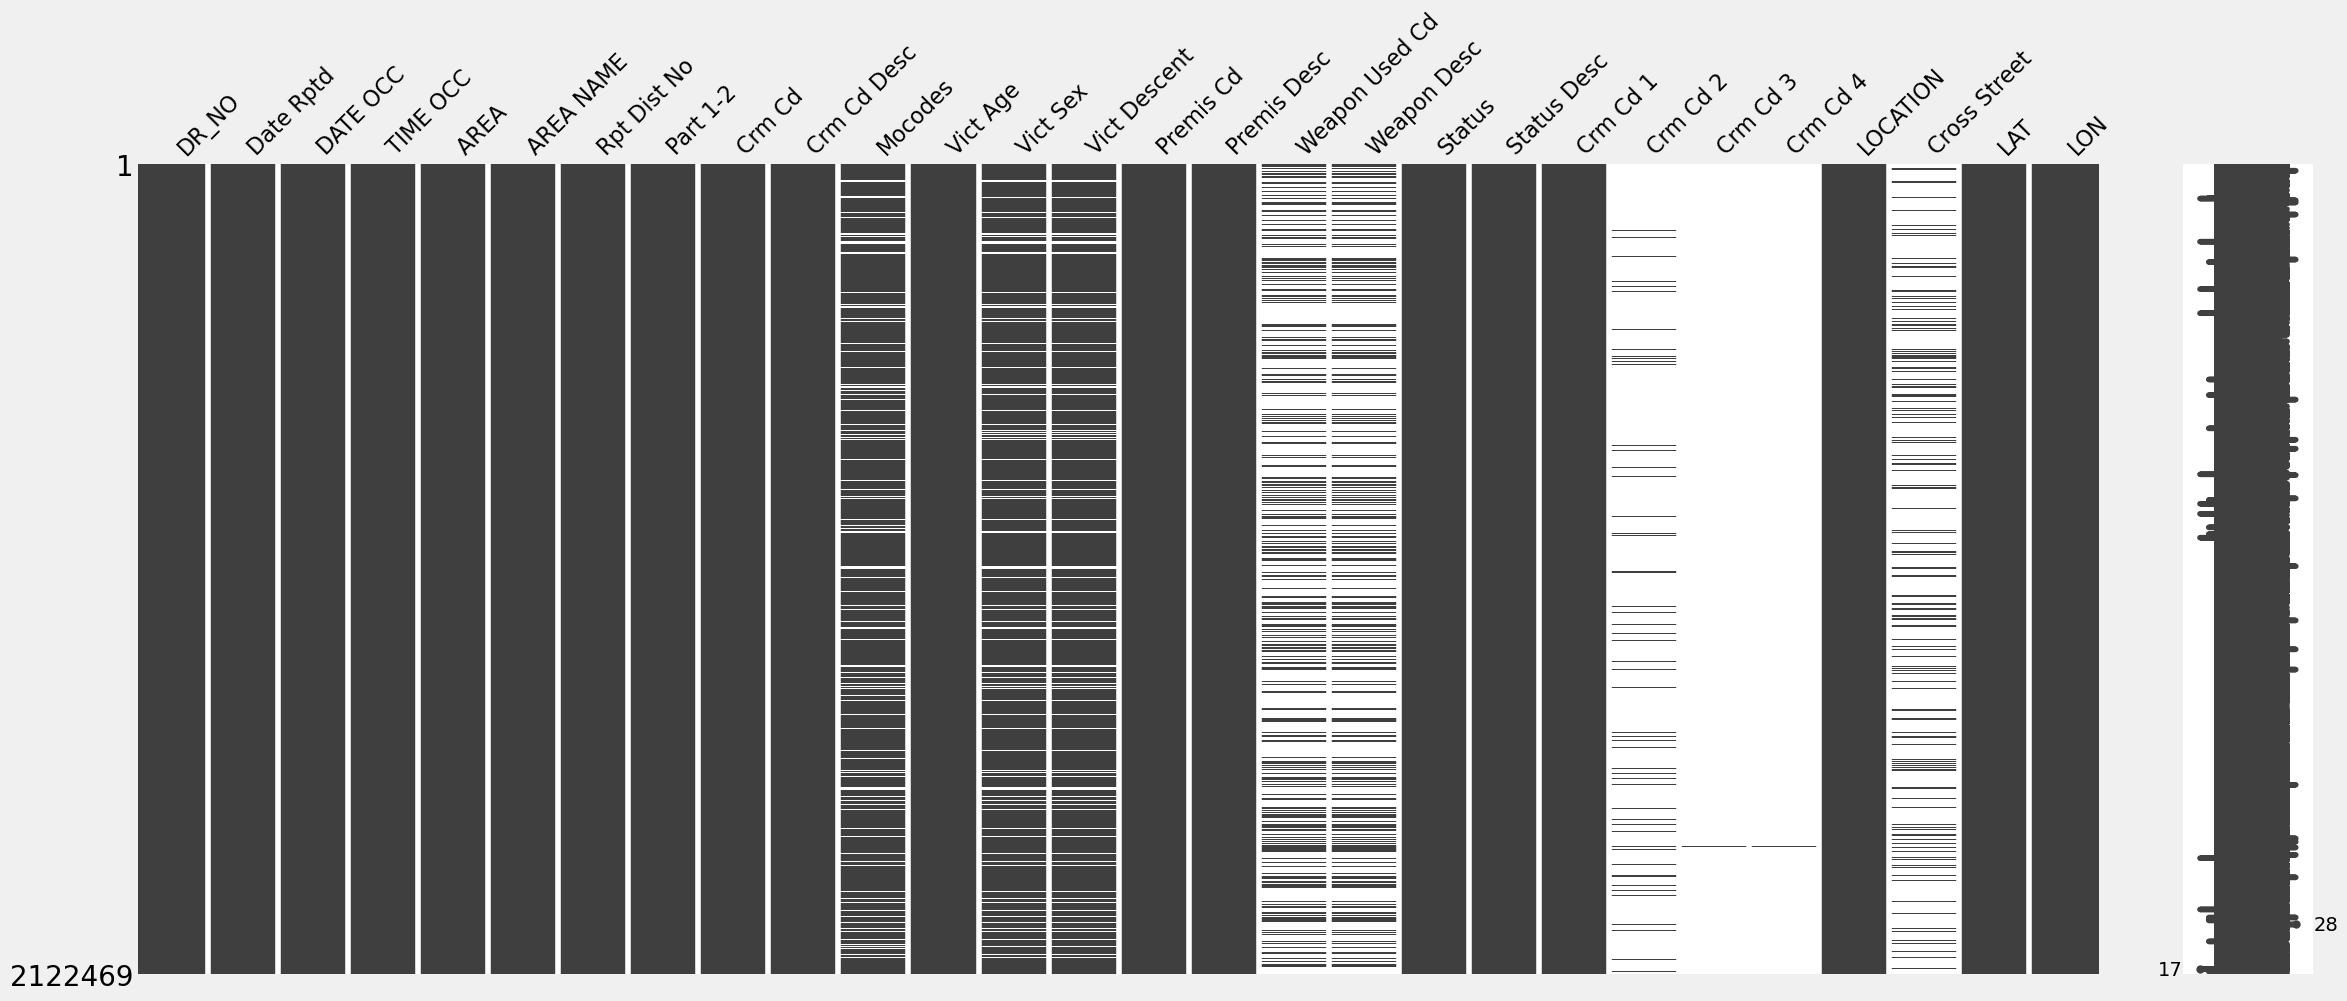

In [9]:
#visualize missing data on the dataframe 
msno.matrix(data_crime_2019)

In [10]:
#Inspecting the dataframe visually
data_crime_2024.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,crm_cd_1,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3
0,190326475,2020-03-01T00:00:00.000,2020-03-01T00:00:00.000,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,M,O,101,STREET,AA,Adult Arrest,510,998.0,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN
1,200106753,2020-02-09T00:00:00.000,2020-02-08T00:00:00.000,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,M,O,128,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330,998.0,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN
2,200320258,2020-11-11T00:00:00.000,2020-11-04T00:00:00.000,1700,3,Southwest,356,1,480,BIKE - STOLEN,19,X,X,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480,NaN,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN
3,200907217,2023-05-10T00:00:00.000,2020-03-10T00:00:00.000,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405,CLOTHING STORE,IC,Invest Cont,343,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN
4,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,28,M,H,102,SIDEWALK,IC,Invest Cont,354,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN


<Axes: >

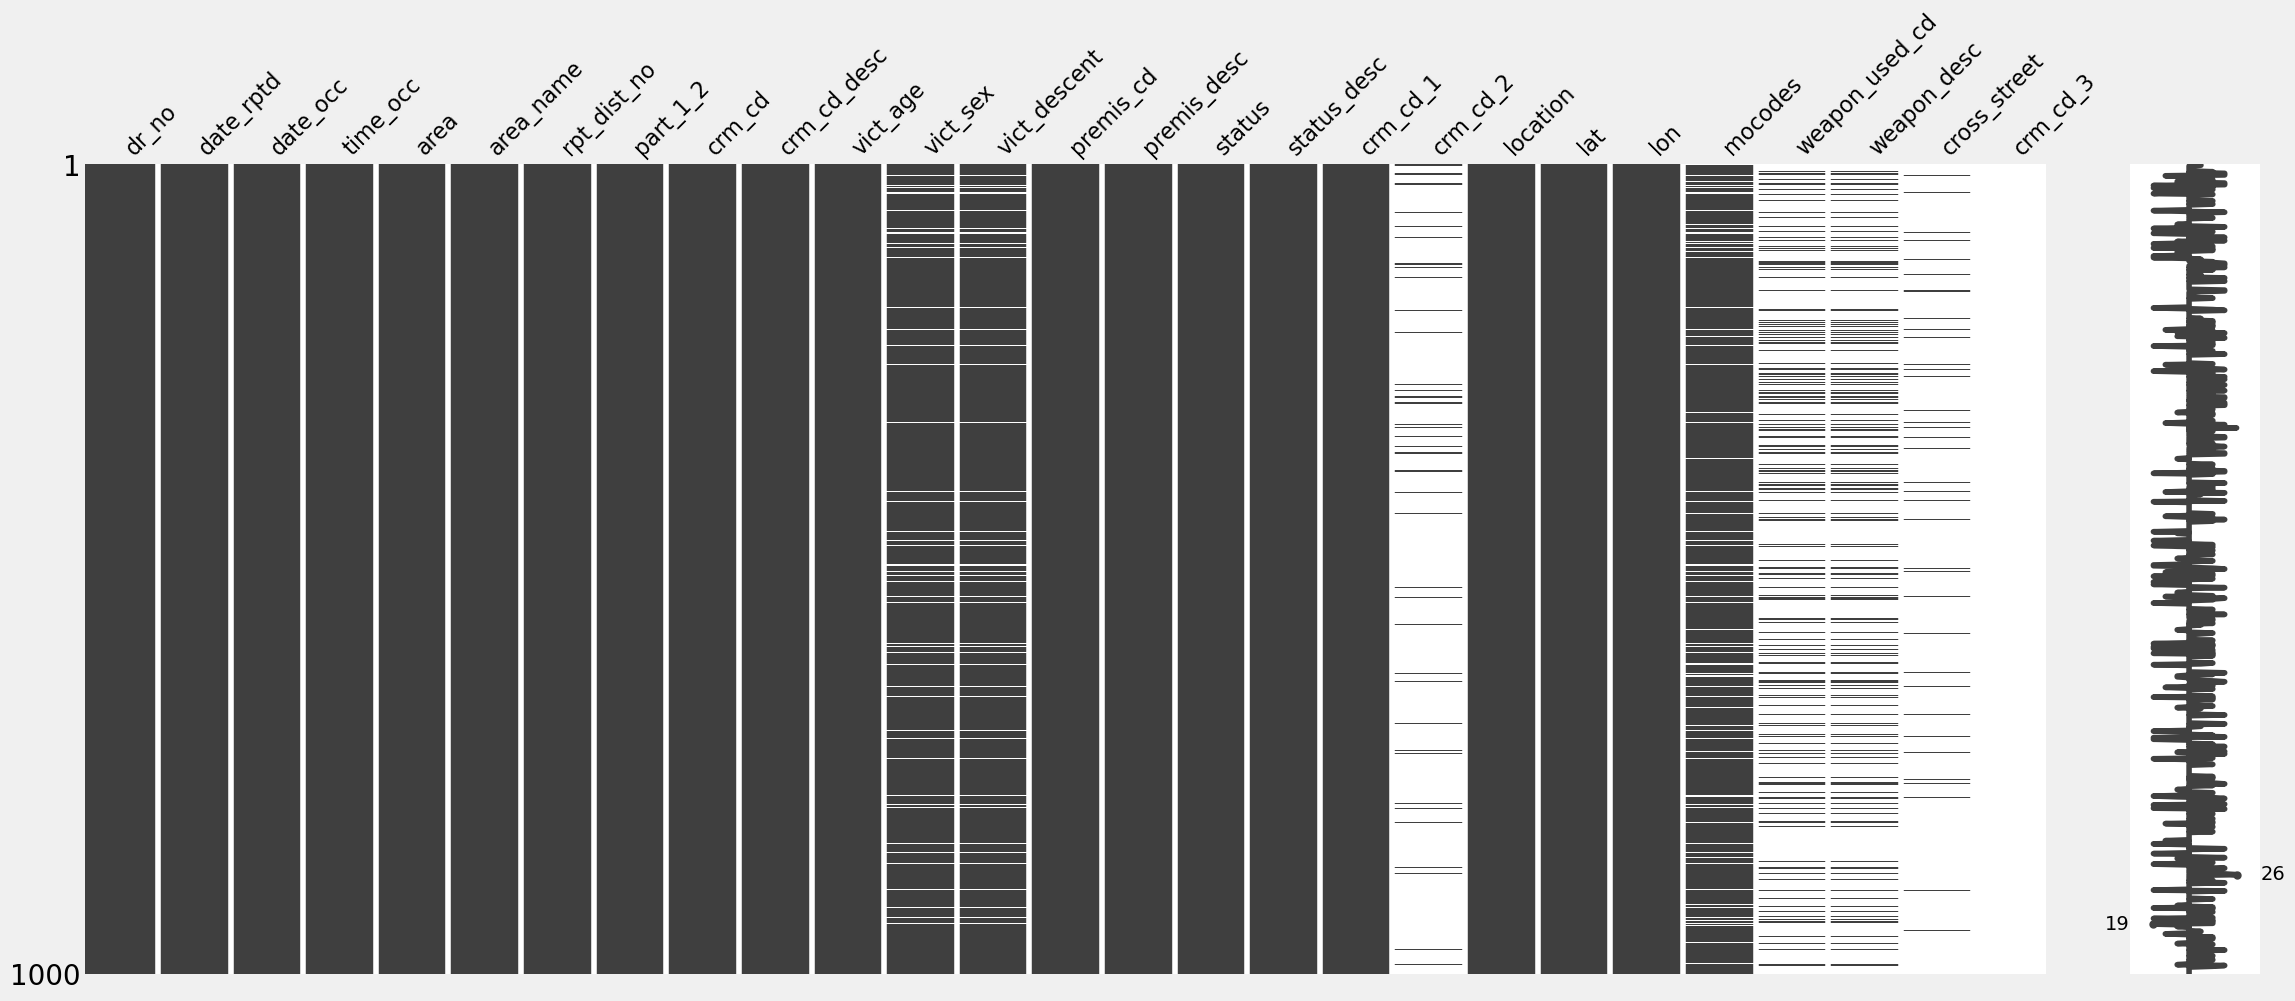

In [11]:
##visualize missing data on the dataframe
msno.matrix(data_crime_2024)

#### Inspecting the dataframe programmatically

In [12]:
#FILL IN - Inspecting the dataframe programmatically
print(data_crime_2019.shape)
data_crime_2019.isnull().sum()

(2122469, 28)


DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            228413
Vict Age                0
Vict Sex           196814
Vict Descent       196860
Premis Cd              53
Premis Desc           187
Weapon Used Cd    1408915
Weapon Desc       1408916
Status                  3
Status Desc             0
Crm Cd 1               10
Crm Cd 2          1981221
Crm Cd 3          2118909
Crm Cd 4          2122364
LOCATION                0
Cross Street      1766744
LAT                     0
LON                     0
dtype: int64

In [13]:
print(data_crime_2024.shape)
data_crime_2024.isnull().sum()

(1000, 27)


dr_no               0
date_rptd           0
date_occ            0
time_occ            0
area                0
area_name           0
rpt_dist_no         0
part_1_2            0
crm_cd              0
crm_cd_desc         0
vict_age            0
vict_sex           58
vict_descent       58
premis_cd           0
premis_desc         0
status              0
status_desc         0
crm_cd_1            0
crm_cd_2          939
location            0
lat                 0
lon                 0
mocodes            92
weapon_used_cd    793
weapon_desc       793
cross_street      953
crm_cd_3          999
dtype: int64

Issue and justification: 
#### its completeness issue Quality issue there is a lot missing values in both datasets :
> #### data_crime_2019 dataset : there is missing values in Crm Cd 2 ,Crm Cd 3 ,Crm Cd 4 most of the columns are missing values and vict_sex,vict_descent, weapon_used_cd ,weapon_desc more than 100 K missing values 
> #### data_crime_2024 dataset : there is missing values incrm_cd_2 ,cross_street most of the columns are minssing values and weapon_used_cd , weapon_desc half of the columns are missing values

### Quality Issue 2: 

In [14]:
# Inspecting  Accuracy issues in the dataframe visually for data_crimes_2019
#Apply the cleaning strategy
data_crime_2019[data_crime_2019['Vict Age'] < 10].head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
37,100100616,02/11/2010 12:00:00 AM,02/11/2010 12:00:00 AM,1515,1,Central,192,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1212,0,M,H,102.0,SIDEWALK,NaN,NaN,AA,Adult Arrest,341.0,NaN,NaN,NaN,PICO,GRAND,34.0389,-118.2643
46,100100638,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,100,1,Central,164,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,740.0,NaN,NaN,NaN,100 W 7TH ST,NaN,34.0439,-118.2514
51,100100654,02/27/2010 12:00:00 AM,02/27/2010 12:00:00 AM,1955,1,Central,174,2,946,OTHER MISCELLANEOUS CRIME,NaN,0,M,W,101.0,STREET,NaN,NaN,AA,Adult Arrest,946.0,NaN,NaN,NaN,W 7TH ST,S SPRING ST,34.0445,-118.2523


In [15]:
# Inspecting the dataframe programmatically for data_crimes_2019
data_crime_2019['Vict Age'].sort_values()

373923     -12
149348     -12
170058     -12
174739     -11
250512     -11
          ... 
19130       99
1990497     99
808911      99
972066     114
1758305    118
Name: Vict Age, Length: 2122469, dtype: int64

In [16]:
data_crime_2024[data_crime_2024['vict_age'] < 10].head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,crm_cd_1,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3
0,190326475,2020-03-01T00:00:00.000,2020-03-01T00:00:00.000,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,M,O,101,STREET,AA,Adult Arrest,510,998.0,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN
11,221908151,2022-04-12T00:00:00.000,2020-10-01T00:00:00.000,1,19,Mission,1988,1,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,8,F,H,501,SINGLE FAMILY DWELLING,IC,Invest Cont,812,821.0,13400 RANGOON ST,34.2285,-118.4258,0913 2024 1817 0360 1258 0507,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",NaN,NaN
12,230204214,2023-01-05T00:00:00.000,2020-02-01T00:00:00.000,800,2,Rampart,201,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,7,F,W,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,812,860.0,900 N MARIPOSA AV,34.0868,-118.2991,1251 1258 0913 0400 0500 0522 1817,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",NaN,NaN
13,230409878,2023-06-19T00:00:00.000,2020-04-11T00:00:00.000,1200,4,Hollenbeck,417,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,8,F,H,501,SINGLE FAMILY DWELLING,IC,Invest Cont,812,860.0,4400 MOONSTONE DR,34.0784,-118.1936,1258 0522 0400 0551 0360 0913,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",NaN,NaN
14,221008844,2022-05-06T00:00:00.000,2020-11-01T00:00:00.000,130,10,West Valley,1029,1,510,VEHICLE - STOLEN,0,NaN,NaN,101,STREET,IC,Invest Cont,510,NaN,VALJEAN ST,34.1939,-118.4859,NaN,NaN,NaN,VANOWEN AV,NaN


In [17]:
data_crime_2024['vict_age'].sort_values()

995    -2
149    -2
686    -2
805    -2
655    -2
       ..
454    82
446    83
954    84
360    89
449    91
Name: vict_age, Length: 1000, dtype: int64

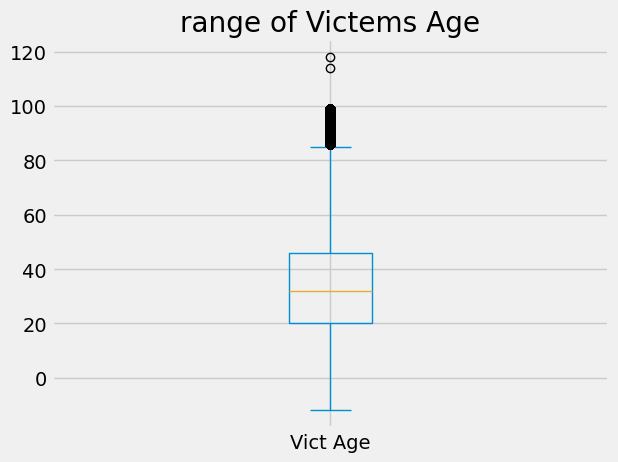

In [18]:
data_crime_2019['Vict Age'].plot(kind='box')
plt.title('range of Victems Age')
plt.show()

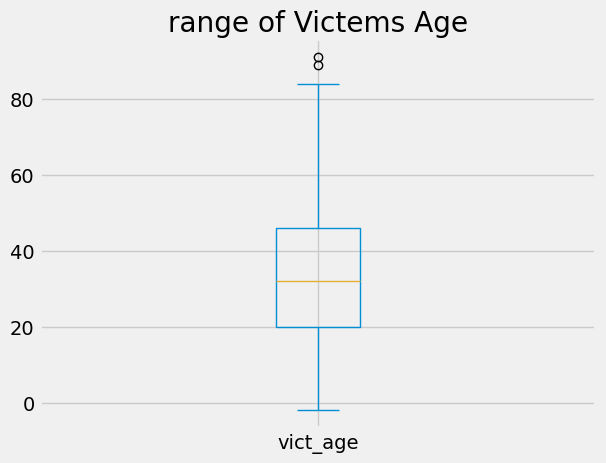

In [19]:
data_crime_2024['vict_age'].plot(kind='box')
plt.title('range of Victems Age')
plt.show()

#### Issue and justification: 
> #### its Accuracy issue  in data Quality issues there is some result contain values that's less than 1 for Ages we have to drop those result because can't find enough information about  the age from other columns and there is a Validity issue there is outlines in the same column in both dataests

### Tidiness Issue 1:

In [20]:
# Inspecting the dataframe visually
data_crime_2019.head(0)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON


In [21]:
#Inspecting the dataframe visually
data_crime_2024.head(0)

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,crm_cd_1,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3


In [22]:
#FILL IN - Inspecting the dataframe programmatically
data_crime_2019.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [23]:
data_crime_2024.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'status',
       'status_desc', 'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon',
       'mocodes', 'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3'],
      dtype='object')

#### Issue and justification: 
> #### uppercase letters are used for column names in data_crime_2019 and lowercase letters are used for column names in data_crime_2024
we have to change data_crime_2019 columns name to lower case letters and change columns to snake_case so we can index it easliy 

### Tidiness Issue 2: 

In [24]:
#Inspecting the dataframe visually for data_crime_2019
data_crime_2019['Crm Cd Desc']

0                                   VIOLATION OF COURT ORDER
1          VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
2                                  OTHER MISCELLANEOUS CRIME
3                                   VIOLATION OF COURT ORDER
4                                            RAPE, ATTEMPTED
                                 ...                        
2122464              CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT
2122465                                                ARSON
2122466               CRIMINAL THREATS - NO WEAPON DISPLAYED
2122467      THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
2122468                                BURGLARY FROM VEHICLE
Name: Crm Cd Desc, Length: 2122469, dtype: object

In [25]:
#Inspecting the dataframe programmatically for data_crime_2019
data_crime_2019['Crm Cd Desc'].unique()

array(['VIOLATION OF COURT ORDER',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'OTHER MISCELLANEOUS CRIME', 'RAPE, ATTEMPTED',
       'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'BURGLARY FROM VEHICLE',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BATTERY - SIMPLE ASSAULT', 'ROBBERY', 'BOMB SCARE',
       'CHILD NEGLECT (SEE 300 W.I.C.)',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'ATTEMPTED ROBBERY',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'BURGLARY', 'ARSON',
       'RAPE, FORCIBLE', 'BRANDISH WEAPON',
       'THROWING OBJECT AT MOVING VEHICLE',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
       'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
       'SHOTS FIRED AT INHABITED DWELLING', 'VEHICLE - STOLEN',
    

In [26]:
#Inspecting the dataframe visually for data_crime_2024
data_crime_2024.crm_cd_desc.head()

0                            VEHICLE - STOLEN
1                       BURGLARY FROM VEHICLE
2                               BIKE - STOLEN
3    SHOPLIFTING-GRAND THEFT ($950.01 & OVER)
4                           THEFT OF IDENTITY
Name: crm_cd_desc, dtype: object

In [27]:
#Inspecting the dataframe programmatically for data_crime_2019
data_crime_2024.crm_cd_desc.unique()

array(['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT OF IDENTITY',
       'BATTERY - SIMPLE ASSAULT',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'RAPE, FORCIBLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'CHILD ANNOYING (17YRS & UNDER)', 'BURGLARY', 'CONTEMPT OF COURT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'LEWD CONDUCT',
       'THEFT PLAIN - ATTEMPT',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',

Issue and justification:
> #### its  Multiple variables are stored in one column 
> #### there is muliple variables in the same cell in one columns crm cd desc the crime description and grand and many crimes 
> we have to separate each crime in one row and grands in another column 

### Tidiness Issue 3 : 

In [28]:
#Inspecting the dataframe visuallyd
data_crime_2019[['Crm Cd','Crm Cd Desc','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4']].head(20)

,Crm Cd,Crm Cd Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4
0,900,VIOLATION OF COURT ORDER,900.0,NaN,NaN,NaN
1,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",740.0,NaN,NaN,NaN
2,946,OTHER MISCELLANEOUS CRIME,946.0,NaN,NaN,NaN
3,900,VIOLATION OF COURT ORDER,900.0,998.0,NaN,NaN
4,122,"RAPE, ATTEMPTED",122.0,NaN,NaN,NaN
5,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),442.0,NaN,NaN,NaN
6,330,BURGLARY FROM VEHICLE,330.0,NaN,NaN,NaN
7,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",230.0,NaN,NaN,NaN
8,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",230.0,NaN,NaN,NaN
9,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",341.0,998.0,NaN,NaN


In [29]:
#Inspecting the dataframe programmatically
data_crime_2019.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            228413
Vict Age                0
Vict Sex           196814
Vict Descent       196860
Premis Cd              53
Premis Desc           187
Weapon Used Cd    1408915
Weapon Desc       1408916
Status                  3
Status Desc             0
Crm Cd 1               10
Crm Cd 2          1981221
Crm Cd 3          2118909
Crm Cd 4          2122364
LOCATION                0
Cross Street      1766744
LAT                     0
LON                     0
dtype: int64

Issue and justification:
> #### its Multiple types of observational units are stored in the same table
> #### we have to remove these columns bc there is Crm Cd column and these columns contian a lot of missing values

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [30]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
data_crime_2019_copy=data_crime_2019.copy()
data_crime_2024_copy=data_crime_2024.copy()

### **Quality Issue 1: missing values

In [31]:
#Apply the cleaning strategy
#drop columns thats contain 60% or above missing values and Mocodes column bc there is no data source about it 
data_crime_2019_copy.drop(columns=['Weapon Used Cd','Weapon Desc','Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street','Mocodes'],inplace=True)

In [32]:
#change the missing values and - to be  X-unknowing 
data_crime_2019_copy['Vict Sex'] = data_crime_2019_copy['Vict Sex'].replace([np.nan, '-'], 'X')
data_crime_2019_copy['Vict Descent'] = data_crime_2019_copy['Vict Descent'].replace([np.nan,'-','unknowing'], 'UN')

In [33]:
#replace rows that's contian nan in Status column by CC from Status Desc related to anther rows contain same result
data_crime_2019_copy['Status'] = data_crime_2019_copy['Status'].replace(np.nan, 'CC')


In [34]:
#exlude the result in Premis Desc thats contain missing values 
data_crime_2019_copy=data_crime_2019_copy[data_crime_2019_copy['Premis Desc'].notnull()]

In [35]:
# full fillment all Crm Cd 1 from Crm Cd 
data_crime_2019_copy['Crm Cd 1'] = data_crime_2019_copy.groupby('Crm Cd')['Crm Cd 1'].ffill()

In [36]:
#Validate the cleaning was successful
data_crime_2019_copy.isna().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Premis Desc     0
Status          0
Status Desc     0
Crm Cd 1        0
LOCATION        0
LAT             0
LON             0
dtype: int64

Justification: 
#### we dropped some columns and some rows and I fill some rows by another rows now there is no missing values in both datasets

### Quality Issue 2:  Accuracy  issue

In [37]:
#Apply the cleaning strategy
data_crime_2019_copy=data_crime_2019_copy[data_crime_2019_copy['Vict Age'] >= 1]
data_crime_2024_copy=data_crime_2024_copy[data_crime_2024_copy['vict_age'] >= 1]

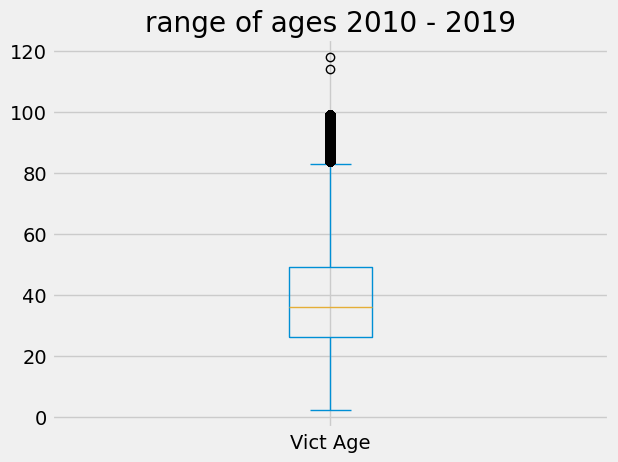

In [38]:
#Validate the cleaning was successful
#Apply the cleaning strategy
data_crime_2019_copy['Vict Age'].plot(kind='box')
plt.title('range of ages 2010 - 2019')
plt.show()

Text(0.5, 1.0, 'range of Ages 2020 - 2024')

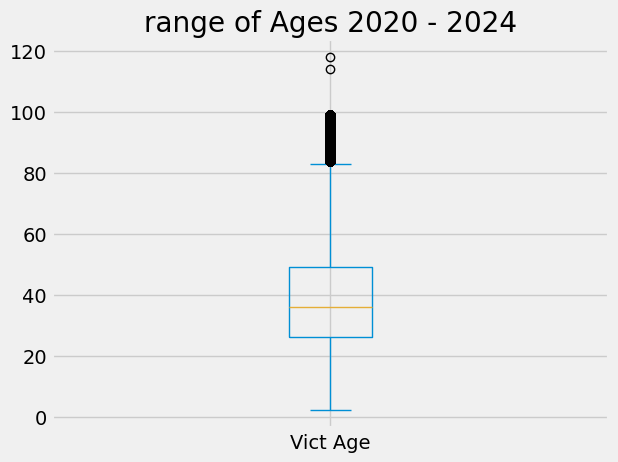

In [39]:
data_crime_2019_copy['Vict Age'].plot(kind='box')
plt.title('range of Ages 2020 - 2024')

Justification:
#### I dropped rows thats contain result for age less than 1 year 

### **Tidiness Issue 1: columns names**

In [40]:
#Apply the cleaning strategy
#We will change data_crime_2019 columns name from upper case into lower case by lambda func
data_crime_2019_copy.rename(columns=lambda x: x.lower(), inplace=True)
data_crime_2019_copy.columns = data_crime_2019_copy.columns.str.replace(' ', '_')

In [41]:
#Validate the cleaning was successful
data_crime_2019_copy.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area_', 'area_name',
       'rpt_dist_no', 'part_1-2', 'crm_cd', 'crm_cd_desc', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'status',
       'status_desc', 'crm_cd_1', 'location', 'lat', 'lon'],
      dtype='object')

In [42]:
data_crime_2024_copy.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'status',
       'status_desc', 'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon',
       'mocodes', 'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3'],
      dtype='object')

Justification:
> #### We will change data_crime_2019 columns name from upper case into lower case by lambda func and we did it now we can combine the two datasets 2019 and 2024

### **Tidiness Issue 2: FILL IN**

In [43]:
def clean_and_transform(dataframe):
    # Perform the split and stack operation on 'crm_cd_desc'
    crm_cd_desc_split = dataframe['crm_cd_desc'].str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True)
    crm_cd_desc_split.name = 'crime'  # Renaming the resulting Series for clarity

    # Join the expanded 'crm_cd_desc' with the original DataFrame based on the index,
    # which contains 'dr_no' and any other additional columns
    dataframe = dataframe.drop(columns=['crm_cd_desc']).join(crm_cd_desc_split).reset_index(drop=True)

    # Change the new 'crime' column from being the last one to be the tenth column from the left
    columns = list(dataframe.columns)
    # First, remove the 'crime' column name
    columns.remove('crime')
    # Then insert 'crime' at the desired position
    columns.insert(9, 'crime')
    # Now, reindex the DataFrame with the new columns order
    dataframe = dataframe.reindex(columns=columns)
    return dataframe

# Assuming data_crime_2019_copy and data_crime_2024_copy are your DataFrames
data_crime_2019_copy = clean_and_transform(data_crime_2019_copy)
data_crime_2024_copy = clean_and_transform(data_crime_2024_copy)



In [44]:
data_crime_2019_copy.head()

,dr_no,date_rptd,date_occ,time_occ,area_,area_name,rpt_dist_no,part_1-2,crm_cd,crime,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,crm_cd_1,location,lat,lon
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,48,M,H,501.0,SINGLE FAMILY DWELLING,AA,Adult Arrest,900.0,300 E GAGE AV,33.9825,-118.2695
1,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,47,F,W,101.0,STREET,IC,Invest Cont,900.0,CAHUENGA BL,34.1016,-118.3295
2,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,RAPE,47,F,H,103.0,ALLEY,IC,Invest Cont,122.0,8TH ST,34.0387,-118.2488
3,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,ATTEMPTED,47,F,H,103.0,ALLEY,IC,Invest Cont,122.0,8TH ST,34.0387,-118.2488
4,100100506,01/05/2010 12:00:00 AM,01/04/2010 12:00:00 AM,1650,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,B,404.0,DEPARTMENT STORE,AA,Adult Arrest,442.0,700 W 7TH ST,34.0480,-118.2577


In [45]:
data_crime_2024_copy.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crime,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,crm_cd_1,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3
0,200106753,2020-02-09T00:00:00.000,2020-02-08T00:00:00.000,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,M,O,128,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330,998.0,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN
1,200320258,2020-11-11T00:00:00.000,2020-11-04T00:00:00.000,1700,3,Southwest,356,1,480,BIKE - STOLEN,19,X,X,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480,NaN,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN
2,200907217,2023-05-10T00:00:00.000,2020-03-10T00:00:00.000,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405,CLOTHING STORE,IC,Invest Cont,343,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN
3,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,28,M,H,102,SIDEWALK,IC,Invest Cont,354,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN
4,231808869,2023-04-04T00:00:00.000,2020-12-01T00:00:00.000,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,41,M,H,501,SINGLE FAMILY DWELLING,IC,Invest Cont,354,NaN,9900 COMPTON AV,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN


In [46]:
#FILL IN - Validate the cleaning was successful
print(data_crime_2019_copy.shape)
print(data_crime_2024_copy.shape)

(2304365, 21)
(1122, 27)


Justification: 
> ### we had a multipul variable inside one column then we solve it as :
>> #### Split the crm cd desc column based on the comma delimiter into a list of crimes.
>> #### Exploded this list to create a new row for each crime while keeping the associated with (dr_no) column.
>> #### Once we had a row for each crime, we reorganized the DataFrame to place the new 'crime' column at the desired tenth position

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [47]:
#Remove unnecessary variables and combine datasets
data_crime_2019_copy.drop(columns=['crm_cd_1','lat','lon'],inplace=True)
data_crime_2024_copy.drop(columns=['crm_cd_1','crm_cd_2','lat','lon','mocodes','weapon_used_cd','weapon_desc','cross_street','crm_cd_3'],inplace=True)
data_crime_2019_copy.rename(columns={'area_': 'area'}, inplace=True)
data_crime_2019_copy.rename(columns={'part_1-2': 'part_1_2'}, inplace=True)

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [77]:
from sqlalchemy import create_engine

In [78]:

cleaned_data_crime=pd.concat([data_crime_2019_copy,data_crime_2024_copy])
cleaned_data_crime.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crime,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,location
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,48,M,H,501.0,SINGLE FAMILY DWELLING,AA,Adult Arrest,300 E GAGE AV
1,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,47,F,W,101.0,STREET,IC,Invest Cont,CAHUENGA BL
2,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,RAPE,47,F,H,103.0,ALLEY,IC,Invest Cont,8TH ST
3,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,ATTEMPTED,47,F,H,103.0,ALLEY,IC,Invest Cont,8TH ST
4,100100506,01/05/2010 12:00:00 AM,01/04/2010 12:00:00 AM,1650,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,B,404.0,DEPARTMENT STORE,AA,Adult Arrest,700 W 7TH ST


In [79]:
#optimize cleaned data

cleaned_data_crime=cleaned_data_crime.astype({'time_occ':'int8','area':'int8','rpt_dist_no':'int8','part_1_2':'int8','crm_cd':'int8','vict_age':'int8','premis_cd':'int8'})
cleaned_data_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2305487 entries, 0 to 1121
Data columns (total 18 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   dr_no         int64 
 1   date_rptd     object
 2   date_occ      object
 3   time_occ      int8  
 4   area          int8  
 5   area_name     object
 6   rpt_dist_no   int8  
 7   part_1_2      int8  
 8   crm_cd        int8  
 9   crime         object
 10  vict_age      int8  
 11  vict_sex      object
 12  vict_descent  object
 13  premis_cd     int8  
 14  premis_desc   object
 15  status        object
 16  status_desc   object
 17  location      object
dtypes: int64(1), int8(7), object(10)
memory usage: 226.5+ MB


In [80]:
#row data 
second_copy_2019=data_crime_2019.copy()
second_copy_2024=data_crime_2020_2024.copy()

### Saving Row data

In [81]:
second_copy_2019.rename(columns=lambda x: x.lower(), inplace=True)
second_copy_2019.columns = second_copy_2019.columns.str.replace(' ', '_')
#row data 
row_data=pd.concat([second_copy_2019,second_copy_2024])
#saving_raw_data
row_data.to_csv('row_data.csv',index=False)
# Save DataFrame to SQLite database
engine = create_engine('sqlite:///datacrime.db')  # Replace 'database.db' with your desired SQLite database file name
row_data.to_sql('row_data_2019_2024', engine, index=False, if_exists='replace') 

2123469

### saving Clean Data crime

In [82]:
#saving cleaned_data_crime to csv file
cleaned_data_crime.to_csv('clean_data_crime.csv',index=False)
#saving cleaned_data_crime to sqlite table
cleaned_data_crime.to_sql('cleaned_data_crime_2019_2024',engine,index=False,if_exists='replace')

2305487

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* FILL IN from answer to Step 1

In [ ]:
#Visual 1 - FILL IN

*Answer to research question:* FILL IN

In [ ]:
#Visual 2 - FILL IN

*Answer to research question:* FILL IN

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* FILL IN